# **Project Name** - **Iris Flower Classification**

## **Project Summary**

The objective of this project is to develop a robust and intelligent classification system that can accurately predict the species of Iris flowers based on four key morphological features: sepal length, sepal width, petal length, and petal width. The project involves training and evaluating multiple machine learning and deep learning models, including Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and a Keras-based Deep Neural Network (DNN). These models are systematically assessed using stratified k-fold cross-validation, and their performance is compared using key evaluation metrics such as accuracy, precision, recall, and F1-score. The best-performing model, based on its weighted F1-score, is selected and serialized using joblib for future deployment.

A core component of the project is the development of a real-time classification dashboard using the Dash framework. This dashboard simulates continuous input data, performs real-time predictions using the saved model, and dynamically visualizes the prediction results. It displays the predicted species, the model's confidence in its predictions through probability graphs, and a rolling table of recent predictions. This real-time system mimics a live production environment where incoming data is classified on the fly.

The key takeaways from this project include practical experience in end-to-end model development—from data preprocessing and model selection to evaluation and deployment. Additionally, it demonstrates the integration of machine learning models with real-time web applications, making it a valuable reference for building intelligent systems that operate in dynamic environments. This project also highlights the importance of model interpretability, performance monitoring, and visualization in real-world machine learning deployments.

### **Problem Statement**

The goal of this project is to build an intelligent classification system that can accurately predict the species of an Iris flower based on its physical characteristics — sepal length, sepal width, petal length, and petal width. The challenge lies in selecting the most effective machine learning or deep learning model that offers high prediction accuracy and generalizes well to unseen data. Furthermore, the solution must be deployable in a real-time environment where new data points can be classified dynamically and visualized through an interactive dashboard. This project addresses the problem of automating species identification using pattern recognition, which has broader applications in fields like agriculture, botany, and real-time data-driven systems.

### **Starting with the Coding**

**Importing Libraries**

In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical



**Dataset Loading**

In [7]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Iris Flower Classification/Iris.csv'

Mounted at /content/drive


In [8]:
# Read the csv file
df= pd.read_csv(path)

# Making a copy of the dataframe
df_clean = df.copy()

**Dataset First View**

In [9]:
# Dataset First Look
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Dataset Rows & Columns count**

In [10]:
# Dataset Rows & Columns count
print("Number of Rows present in the Dataset:",df_clean.shape[0])
print("Number of Columns present in the Dataset:",df_clean.shape[1])

Number of Rows present in the Dataset: 150
Number of Columns present in the Dataset: 6


**Dataset Information**

In [11]:
# Dataset Info
print(" Dataset Information:  \n")
df_clean.info()

 Dataset Information:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Duplicate Values**

In [12]:
# Dataset Duplicate Value Count
print("Number of Duplicate Values:", df_clean.duplicated().sum())

Number of Duplicate Values: 0


**Missing Values/Null Values**

In [13]:
# Missing Values/Null Values Count
print("Missing Values in each Columns of the Dataset: \n")
print(df_clean.isnull().sum())

Missing Values in each Columns of the Dataset: 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


**Visualization of Missing Values in the dataset**

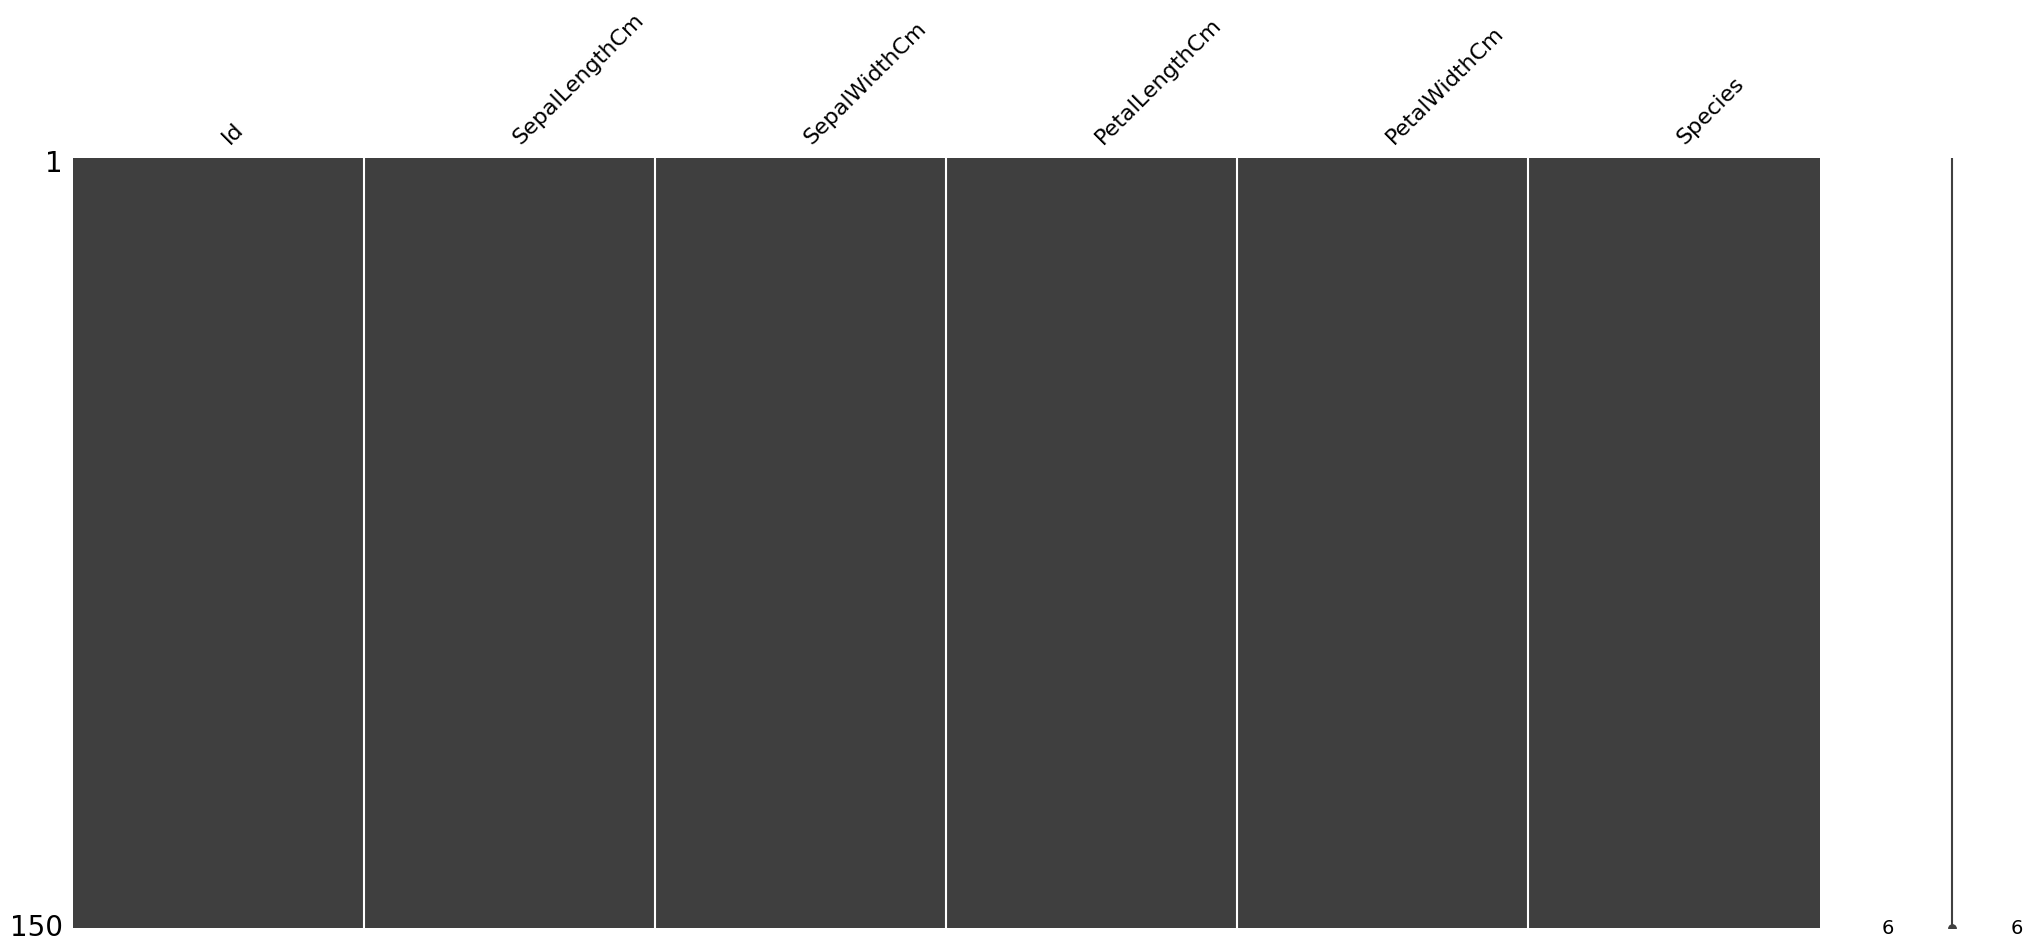

In [14]:
# Visualizing the missing values
# Missingno Matrix
import missingno as msno
msno.matrix(df_clean)
plt.show()

 **Label Encoding**

In [15]:
if df['Species'].dtype == 'object':
    le = LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])

**Split Features and Target**

In [16]:
X = df.drop('Species', axis=1)  # Keeping only 4 features
y = df['Species']               # target

In [17]:
print(X.shape)

(150, 5)


In [18]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [19]:
df.drop(columns=['Id', 'Unnamed: 0'], errors='ignore', inplace=True)

In [20]:
X = df.drop('Species', axis=1)

In [21]:
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


**Scaling the Features**

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

**Train-Test Split**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**One-Hot Encode Target for Keras**

In [28]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

### **Models**


In [29]:
pip install scikeras

In [35]:
from scikeras.wrappers import KerasClassifier

In [36]:
# Classical ML Models with Hyperparameters
model_defs = {
    "Logistic Regression": LogisticRegression(C=0.1, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', probability=True)
}

# Deep Learning Model
def build_keras_model():
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_defs["Keras DNN"] = KerasClassifier(build_fn=build_keras_model, epochs=100, batch_size=5, verbose=0)


### **Cross-Validation Training and Evaluation**

In [37]:
# Setting up
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

best_model = None
best_score = 0
best_model_name = ""

# Training and Evaluation
for name, model in model_defs.items():
    print(f"\n Training: {name}")

    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []

    for train_idx, test_idx in skf.split(X_scaled, y):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if name == "Keras DNN":
            try:
                y_train_cat = to_categorical(np.array(y_train, dtype='int'))
                y_test_cat = to_categorical(np.array(y_test, dtype='int'))

                model.fit(X_train, y_train_cat, epochs=30, batch_size=5, verbose=0, validation_split=0.1)
                y_pred = model.predict(X_test)
                y_pred = np.argmax(y_pred, axis=1)
            except Exception as e:
                print(f" Error training {name}:", e)
                continue
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Evaluate (outside the if-else block)
        acc_scores.append(accuracy_score(y_test, y_pred))
        prec_scores.append(precision_score(y_test, y_pred, average='weighted'))
        rec_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

    # Storing the average scores
    acc = np.mean(acc_scores)
    prec = np.mean(prec_scores)
    rec = np.mean(rec_scores)
    f1 = np.mean(f1_scores)

    results["Model"].append(name)
    results["Accuracy"].append(round(acc, 4))
    results["Precision"].append(round(prec, 4))
    results["Recall"].append(round(rec, 4))
    results["F1 Score"].append(round(f1, 4))

    # Checking for the best model
    if f1 > best_score:
        best_score = f1
        best_model = model
        best_model_name = name

print("\n Evaluation complete!")



 Training: Logistic Regression

 Training: Random Forest

 Training: KNN

 Training: SVM

 Training: Keras DNN

 Evaluation complete!


### **Evaluation Matrix Chart**


 Evaluation Metrics Summary:
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.8333     0.8650  0.8333    0.8274
1        Random Forest    0.9667     0.9695  0.9667    0.9665
2                  KNN    0.9400     0.9429  0.9400    0.9401
3                  SVM    0.9533     0.9549  0.9533    0.9532
4            Keras DNN    0.9267     0.9282  0.9267    0.9265

 Best Model is - Random Forest:
        Model  Accuracy  Precision  Recall  F1 Score
Random Forest    0.9667     0.9695  0.9667    0.9665


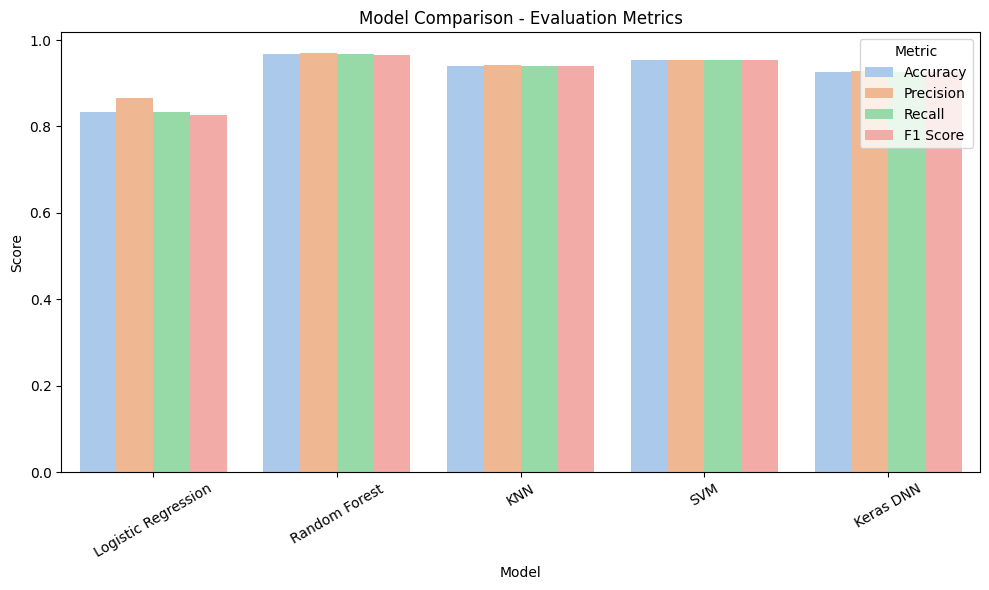

In [44]:
# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show Table
print("\n Evaluation Metrics Summary:")
print(results_df)

# Print Best Model's Metrics Separately
best_model_metrics = results_df[results_df["Model"] == best_model_name]
print(f"\n Best Model is - {best_model_name}:")
print(best_model_metrics.to_string(index=False))

# Plot Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df.melt(id_vars="Model"),
    x="Model",
    y="value",
    hue="variable",
    palette="pastel"
)
plt.title("Model Comparison - Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()



### **Radar Chart for the Best Performing Model**


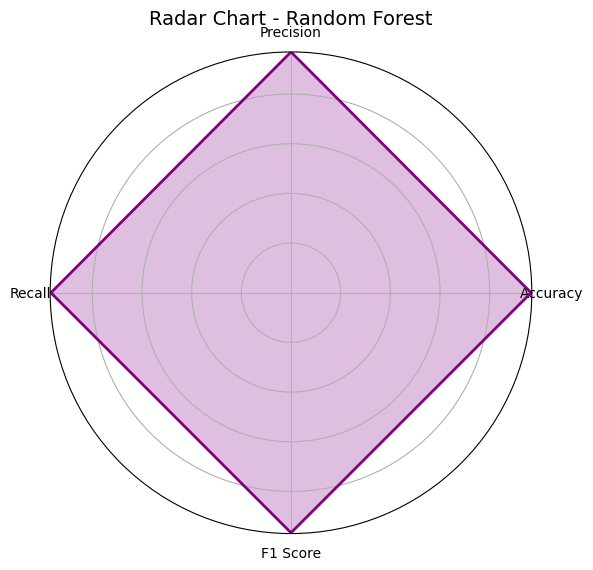

In [45]:
# Radar Chart for Best Model
import numpy as np

# Extract metrics (excluding 'Model' column)
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = best_model_metrics.iloc[0][metrics].values.flatten().tolist()
values += values[:1]

# Angles for axes
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='purple', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='purple', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticklabels([])
ax.set_title(f"Radar Chart - {best_model_name}", size=14, pad=20)
plt.tight_layout()
plt.show()


### **Saving the Best Model**

In [46]:
print(f"\n Best Model: {best_model_name} (F1 Score: {round(best_score, 4)})")

# Save the best model (Random Forest)
joblib.dump(best_model, "best_model_random_forest.pkl")


print("\n Random Forest model saved successfully as 'best_model_random_forest.pkl'")



 Best Model: Random Forest (F1 Score: 0.9665)

 Random Forest model saved successfully as 'best_model_random_forest.pkl'


### **Building Real-Time Classification Dashboard**

In [47]:
pip install dash

In [48]:
!pip install dash


In [49]:
pip install dash plotly pandas scikit-learn joblib

In [51]:
import dash
from dash import html, dcc, Output, Input, dash_table
import pandas as pd
import numpy as np
import plotly.express as px
import joblib
from sklearn.preprocessing import StandardScaler

# Load model and scaler
model = joblib.load("best_model_random_forest.pkl")
scaler = joblib.load("scaler.pkl")

# Class names
target_names = ['setosa', 'versicolor', 'virginica']

# Storage for predictions
prediction_history = pd.DataFrame(columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Predicted'])

# Create Dash app
app = dash.Dash(__name__)
app.title = "Iris Classifier - Real-Time Dashboard"

app.layout = html.Div([
    html.H1("Iris Species Real-Time Classification Dashboard", style={"textAlign": "center"}),

    dcc.Interval(
        id='interval-component',
        interval=3000,  # every 3 seconds
        n_intervals=0
    ),

    html.Div([
        html.H4("Latest Prediction:"),
        html.Div(id='live-prediction', style={"fontSize": "24px", "color": "#333"}),
    ], style={"padding": "20px", "border": "1px solid #ccc", "marginBottom": "20px"}),

    dcc.Graph(id='probability-graph'),

    html.H4(" Recent Predictions"),
    dash_table.DataTable(
        id='live-table',
        columns=[
            {'name': 'SepalLength', 'id': 'SepalLength'},
            {'name': 'SepalWidth', 'id': 'SepalWidth'},
            {'name': 'PetalLength', 'id': 'PetalLength'},
            {'name': 'PetalWidth', 'id': 'PetalWidth'},
            {'name': 'Predicted', 'id': 'Predicted'},
        ],
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'center'},
        page_size=10
    )
])

@app.callback(
    Output('live-prediction', 'children'),
    Output('probability-graph', 'figure'),
    Output('live-table', 'data'),
    Input('interval-component', 'n_intervals')
)
def update_dashboard(n):
    global prediction_history

    try:
        # Simulate new measurement
        sepal_length = np.round(np.random.uniform(4.3, 7.9), 1)
        sepal_width = np.round(np.random.uniform(2.0, 4.4), 1)
        petal_length = np.round(np.random.uniform(1.0, 6.9), 1)
        petal_width = np.round(np.random.uniform(0.1, 2.5), 1)

        # Predict
        new_sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
        new_scaled = scaler.transform(new_sample)
        prediction = model.predict(new_scaled)[0]

        # Append to prediction history
        new_row = {
            "SepalLength": sepal_length,
            "SepalWidth": sepal_width,
            "PetalLength": petal_length,
            "PetalWidth": petal_width,
            "Predicted": target_names[prediction]
        }
        prediction_history = pd.concat([prediction_history, pd.DataFrame([new_row])], ignore_index=True)

        # Probabilities
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(new_scaled)[0]
        else:
            probs = [1.0 if i == prediction else 0.0 for i in range(3)]

        # Bar plot
        fig = px.bar(
            x=target_names,
            y=probs,
            labels={'x': 'Species', 'y': 'Probability'},
            title='Prediction Confidence',
            color=target_names,
            color_discrete_sequence=px.colors.qualitative.Pastel
        )
        fig.update_yaxes(range=[0, 1])

        return (
            f"Predicted Species: {target_names[prediction]} ",
            fig,
            prediction_history.tail(10).to_dict('records')
        )

    except Exception as e:
        print(" Callback Error:", e)
        # Return placeholder plot on error
        fig = px.bar(x=['setosa', 'versicolor', 'virginica'], y=[0, 0, 0],
                     labels={'x': 'Species', 'y': 'Probability'},
                     title=" Error occurred", color_discrete_sequence=px.colors.qualitative.Pastel)
        return " Error in prediction", fig, []

# Run the app
if __name__ == '__main__':
    app.run(debug=True)




<IPython.core.display.Javascript object>